In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
pd.set_option('display.max_columns', None)

In [ ]:
file_path = "/content/kidney_disease.csv"
df = pd.read_csv(file_path)

In [ ]:
df.shape

(400, 26)

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
df["classification"] = df["classification"].replace("ckd\t","ckd")

In [ ]:
df['classification'].value_counts()

,count
classification,
ckd,250
notckd,150


In [ ]:
df.drop('id', axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Below we'll change classifictaion column to binary values 0 or 1.
classification_new = []
for val in df["classification"]:
  if val == "ckd":
    classification_new.append(1)
  else:
    classification_new.append(0)

df["classification"] = classification_new
df['classification'].value_counts()

,count
classification,
1,250
0,150


<Axes: xlabel='classification'>

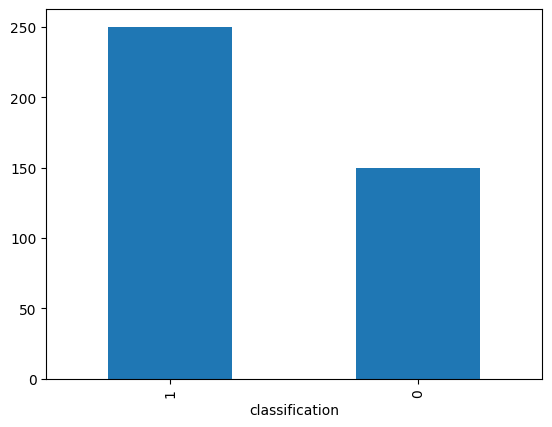

In [ ]:
df['classification'].value_counts().plot(kind='bar')

In [ ]:
# Now we're showing missing values in our dataset.
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


Numerical columns:
Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'classification'],
      dtype='object')

Categorical columns:
Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


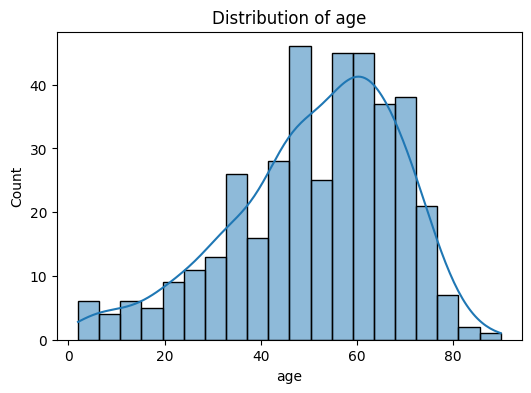

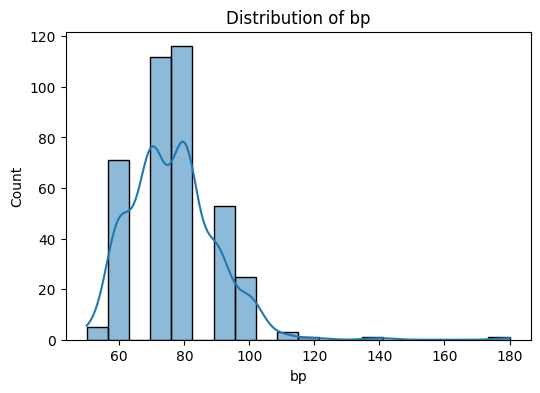

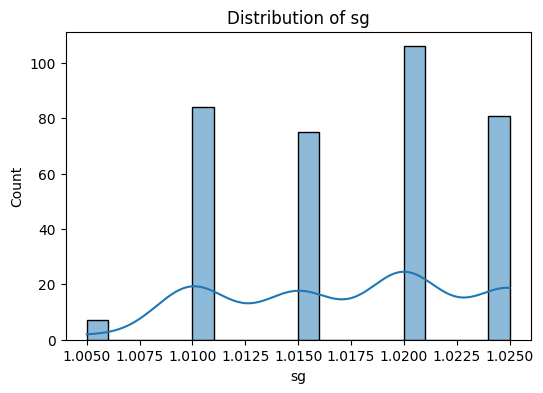

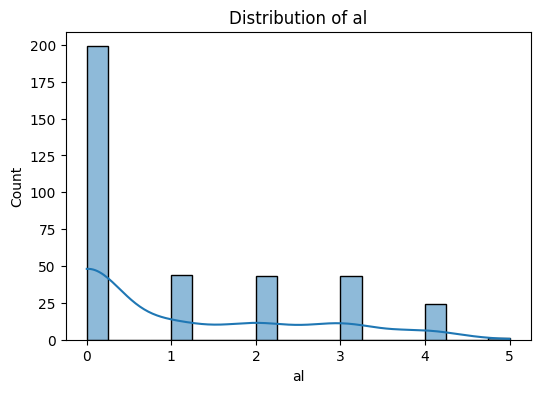

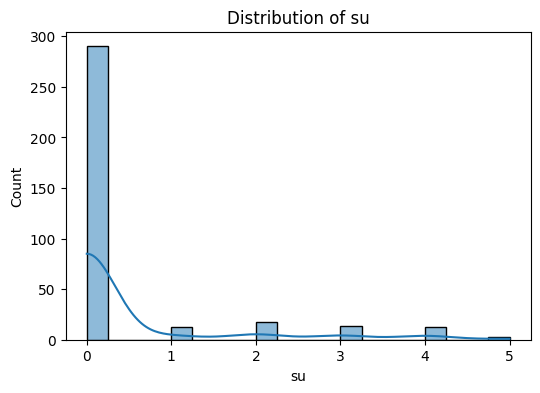

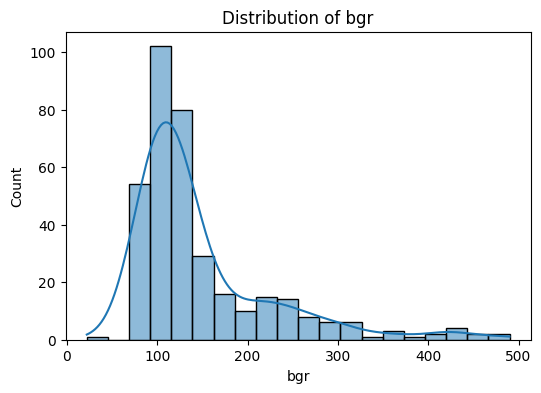

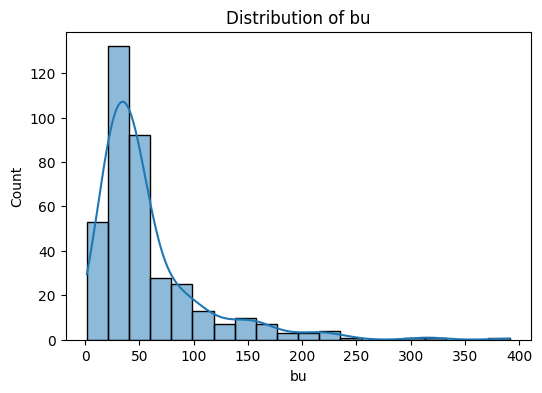

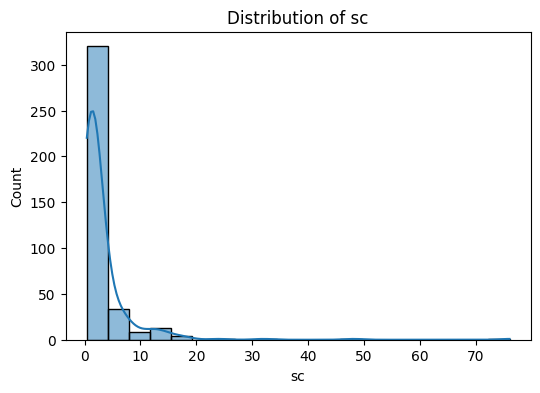

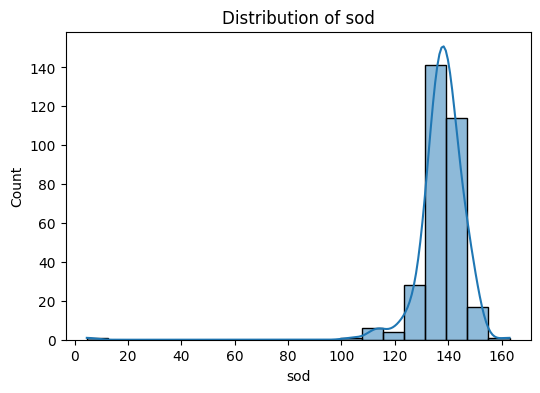

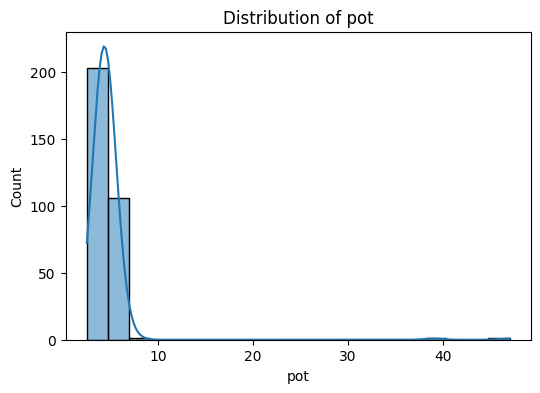

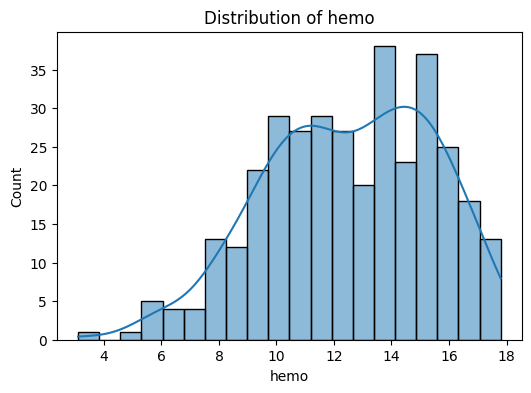

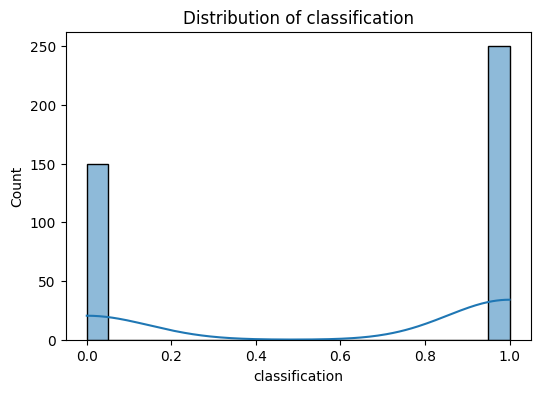

In [ ]:
# Here we're plotting distro so that we can compare later
# with these distro whether imputation and normalization has
# changed distro or not.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Here we're cleaning dataset
df['pcv'] = df['pcv'].replace('', '0')
df['rc'] = df['rc'].replace('', '0')
df['wc'] = df['wc'].replace('', '0')
df['pcv'] = df['pcv'].replace('\t?', '')
df['rc'] = df['rc'].replace('\t?', '')
df['wc'] = df['wc'].replace('\t?', '')
df['pcv'] = df['pcv'].replace('\t43', '43')
df['wc'] = df['wc'].replace('\t6200', '6200')
df['wc'] = df['wc'].replace('\t8400', '8400')

In [ ]:
# Below we're doing imputation for numerical cols,if distro is almost normal use mean
# Otherwise use median.
for col in num_cols:
    if df[col].isnull().sum() > 0:
        skewness = df[col].skew()
        if abs(skewness) < 0.5:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())

In [ ]:
print(df.isnull().sum())

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
categorical_columns = ['rbc', 'pc','pcc','ba', 'htn','dm','cad','appet','pe','ane']
df[categorical_columns].isnull().mean()*100

,0
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00
htn,0.50
dm,0.50
cad,0.50
appet,0.25
pe,0.25
ane,0.25


In [ ]:
# For categorical cols we're replacing missing values with mode.
for i in categorical_columns:
    print(i, ": ", df[i].mode())

rbc :  0    normal
Name: rbc, dtype: object
pc :  0    normal
Name: pc, dtype: object
pcc :  0    notpresent
Name: pcc, dtype: object
ba :  0    notpresent
Name: ba, dtype: object
htn :  0    no
Name: htn, dtype: object
dm :  0    no
Name: dm, dtype: object
cad :  0    no
Name: cad, dtype: object
appet :  0    good
Name: appet, dtype: object
pe :  0    no
Name: pe, dtype: object
ane :  0    no
Name: ane, dtype: object


In [ ]:
df['rbc'] = df['rbc'].fillna('normal')
df['pc'] = df['pc'].fillna('normal')
df['pcc'] = df['pcc'].fillna('notpresent')
df['ba'] = df['ba'].fillna('notpresent')
df['htn'] = df['htn'].fillna('no')
df['dm'] = df['dm'].fillna('no')
df['cad'] = df['cad'].fillna('no')
df['appet'] = df['appet'].fillna('good')
df['pe'] = df['pe'].fillna('no')
df['ane'] = df['ane'].fillna('no')

In [ ]:
df['pcv'] = df['pcv'].astype(str).str.strip()
df['pcv'] = df['pcv'].replace(['', '\t?', '\t43'], ['0', '0', '43']).replace(r'[^\d]', '0', regex=True).astype(int)

df['wc'] = df['wc'].astype(str).str.strip()
df['wc'] = df['wc'].replace(['', '\t?', '\t6200', '\t8400'], ['0', '0', '6200', '8400']).replace(r'[^\d]', '0', regex=True).astype(int)

df['rc'] = df['rc'].astype(str).str.strip()
df['rc'] = df['rc'].replace(['', '\t?'], ['0', '0']).replace(r'[^\d.]', '0', regex=True).astype(float)

df['dm'] = df['dm'].str.strip()
df['cad'] = df['cad'].str.strip()

In [ ]:
# Replacing NaN values
df['pcv'] = df['pcv'].fillna(0).astype(int)
df['wc'] = df['wc'].fillna(0).astype(int)
df['rc'] = df['rc'].fillna(0.0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [ ]:
cat_mapping = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [ ]:
# Here we're converting categorical cols into binary values
df[categorical_columns] = df[categorical_columns].replace(cat_mapping)

<ipython-input-22-eac93471c915>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_columns] = df[categorical_columns].replace(cat_mapping)


In [ ]:
df.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
77,67.0,70.0,1.010000,1.0,0.0,0,0,0,0,102.0,48.0,3.2,137.0,5.0,11.9,34,7100,3.7,1,1,0,1,1,0,1
275,52.0,80.0,1.020000,0.0,0.0,0,0,0,0,125.0,22.0,1.2,139.0,4.6,16.5,43,4700,4.6,0,0,0,1,0,0,0
84,59.0,70.0,1.010000,3.0,0.0,0,1,0,0,76.0,186.0,15.0,135.0,7.6,7.1,22,3800,2.1,1,0,0,0,1,1,1
280,47.0,80.0,1.017408,0.0,0.0,0,0,0,0,93.0,33.0,0.9,144.0,4.5,13.3,52,8100,5.2,0,0,0,1,0,0,0
364,73.0,80.0,1.025000,0.0,0.0,0,0,0,0,118.0,44.0,0.7,137.0,3.5,14.8,45,9300,4.7,0,0,0,1,0,0,0
99,56.0,180.0,1.017408,0.0,4.0,0,1,0,0,298.0,24.0,1.2,139.0,3.9,11.2,32,10400,4.2,1,1,0,0,1,0,1
114,12.0,60.0,1.015000,3.0,0.0,1,1,1,0,121.0,51.0,1.8,138.0,4.4,12.1,0,10300,0.0,0,0,0,1,0,0,1
388,51.0,80.0,1.020000,0.0,0.0,0,0,0,0,94.0,15.0,1.2,144.0,3.7,15.5,46,9500,6.4,0,0,0,1,0,0,0
274,19.0,80.0,1.020000,0.0,0.0,0,0,0,0,107.0,23.0,0.7,141.0,4.2,14.4,44,0,0.0,0,0,0,1,0,0,0
295,44.0,70.0,1.017408,0.0,0.0,0,0,0,0,106.0,25.0,0.9,150.0,3.6,15.0,50,9600,6.5,0,0,0,1,0,0,0


<Axes: >

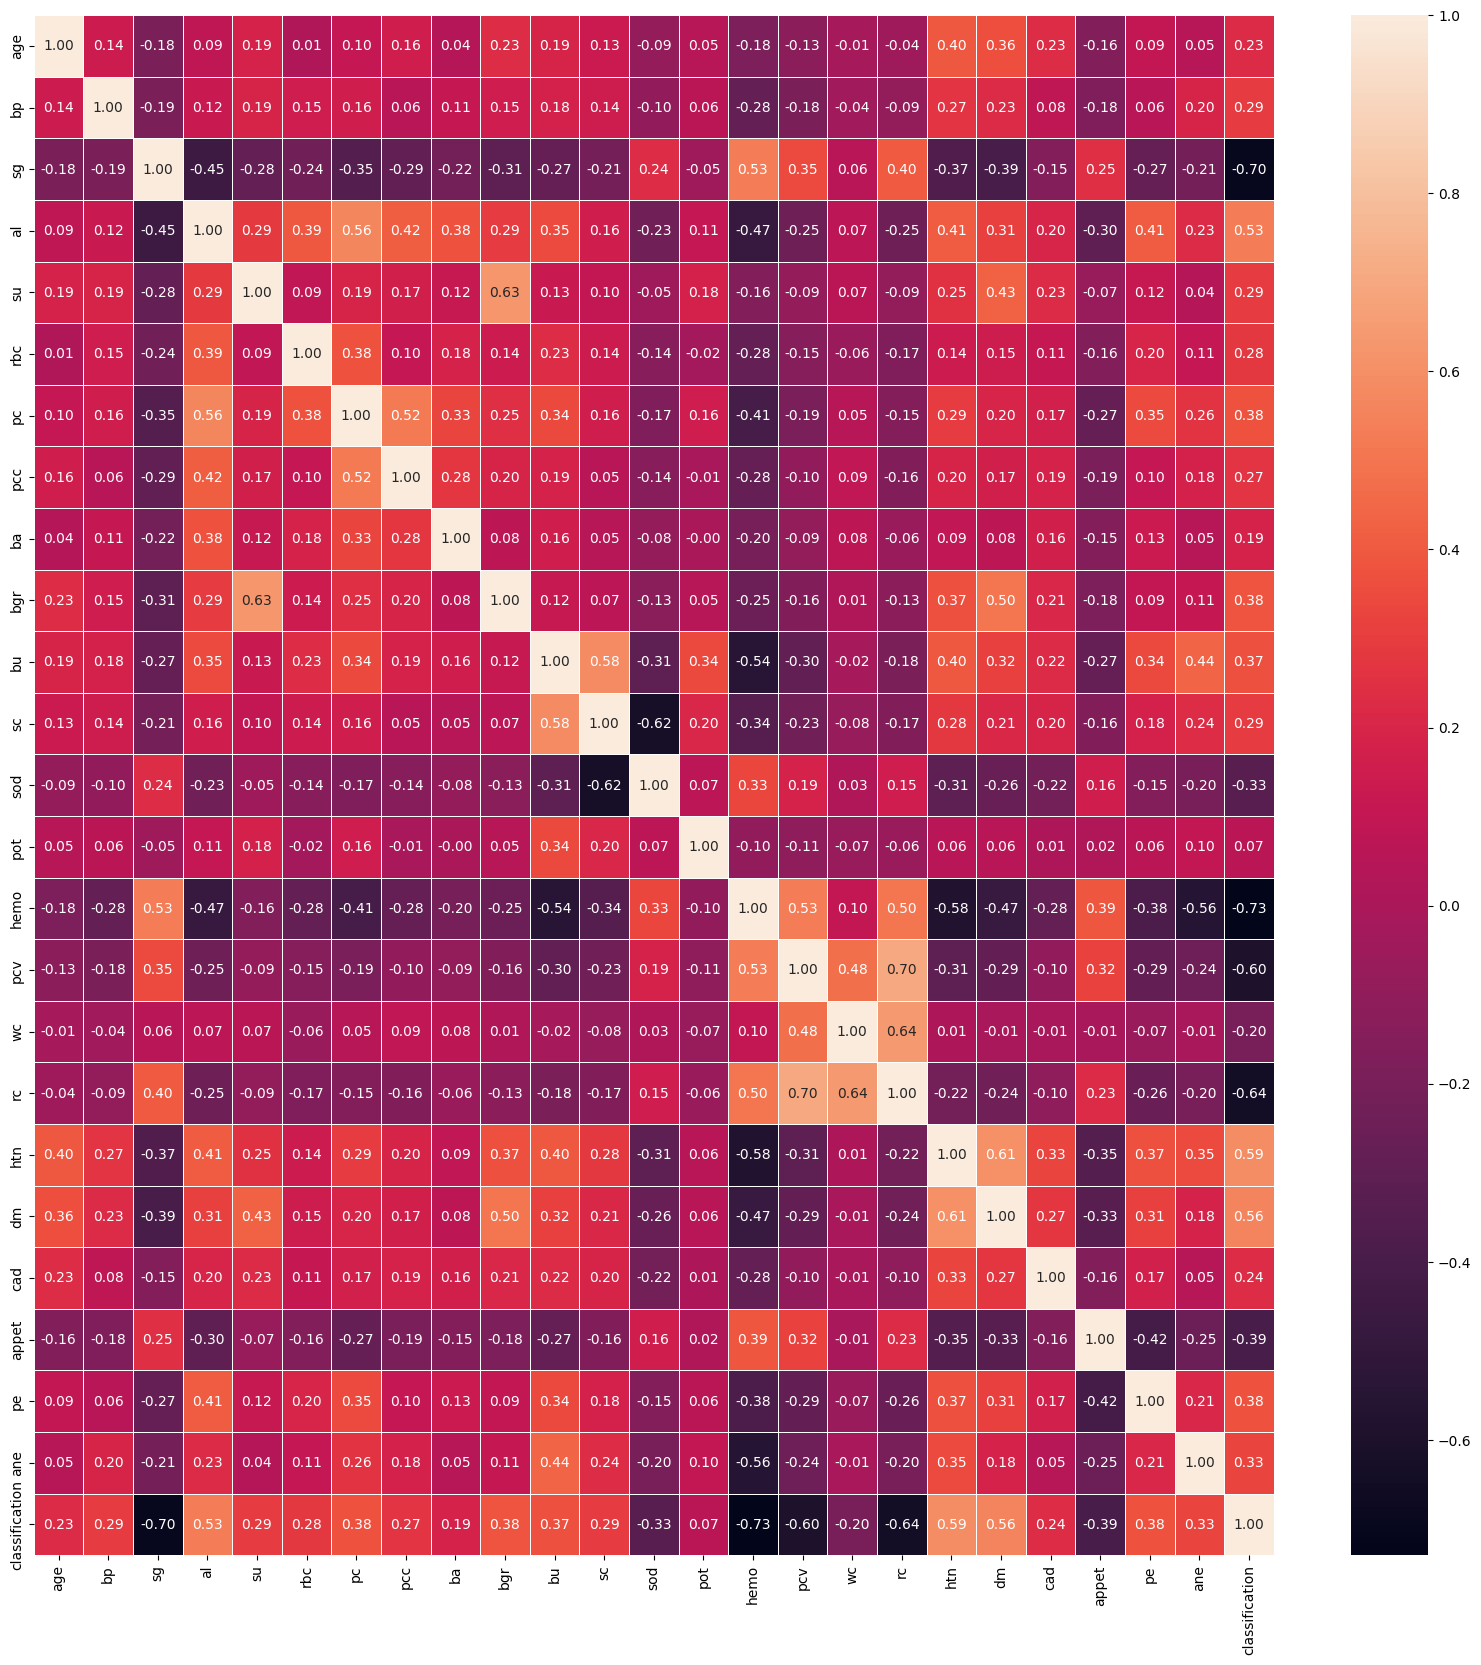

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [ ]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.182364,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178542,-0.126080,-0.013779,-0.042116,0.395073,0.364306,0.231419,-0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,-0.185222,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279827,-0.184379,-0.038166,-0.092567,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
sg,-0.182364,-0.185222,1.000000,-0.450452,-0.282115,-0.236228,-0.345325,-0.290663,-0.220792,-0.308115,-0.274926,-0.210004,0.236087,-0.051244,0.531755,0.350455,0.055365,0.400963,-0.366959,-0.393190,-0.154803,0.246822,-0.272476,-0.213276,-0.698957
al,0.085918,0.123518,-0.450452,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474211,-0.246268,0.071466,-0.245106,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,-0.282115,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156876,-0.086976,0.066220,-0.088183,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,0.014904,0.150384,-0.236228,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,0.233935,0.135660,-0.139037,-0.020473,-0.280990,-0.146724,-0.064897,-0.174080,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,0.102286,0.156231,-0.345325,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,0.344501,0.158038,-0.171171,0.155434,-0.411500,-0.193972,0.050349,-0.150191,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,0.157401,0.056808,-0.290663,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,0.189094,0.054429,-0.138816,-0.011416,-0.275763,-0.095439,0.093834,-0.164127,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,-0.220792,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,0.161676,0.053959,-0.082156,-0.001944,-0.204954,-0.093606,0.075242,-0.063786,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,-0.308115,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254959,-0.163157,0.014115,-0.125367,0.367816,0.503254,0.207020,-0.177285,0.094806,0.112449,0.379321


In [ ]:
df.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
286,71.0,70.0,1.020,0.0,0.0,0,0,0,0,81.0,18.0,0.8,145.0,5.0,14.700000,44,9800,6.0,0,0,0,1,0,0,0
334,24.0,80.0,1.025,0.0,0.0,0,0,0,0,125.0,42.0,1.3,136.0,3.5,15.400000,43,5600,4.5,0,0,0,1,0,0,0
177,65.0,80.0,1.015,2.0,1.0,0,0,1,0,215.0,133.0,2.5,138.0,4.4,13.200000,41,0,0.0,0,1,0,1,0,0,1
113,61.0,90.0,1.015,0.0,2.0,0,0,0,0,121.0,42.0,1.3,138.0,4.4,12.526437,0,9800,0.0,0,1,0,0,0,1,1
117,55.0,70.0,1.020,0.0,0.0,0,0,0,0,219.0,36.0,1.3,139.0,3.7,12.500000,37,9800,4.4,0,0,0,1,0,0,1


In [ ]:
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo','pcv','wc','rc']

In [ ]:
# Here we're normalizing cols.
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [ ]:
for col in numerical_cols:
    df[col] = min_max_normalization(df[col])

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.522727,0.230769,0.75,0.2,0.0,0,0,0,0,0.211538,0.088575,0.010582,0.842271,0.042697,0.836735,0.814815,0.295455,0.6500,1,1,0,1,0,0,1
1,0.056818,0.000000,0.75,0.8,0.0,0,0,0,0,0.211538,0.042362,0.005291,0.842271,0.042697,0.557823,0.703704,0.227273,0.0000,0,0,0,1,0,0,1
2,0.681818,0.230769,0.25,0.4,0.6,0,0,0,0,0.856838,0.132221,0.018519,0.842271,0.042697,0.442177,0.574074,0.284091,0.0000,0,1,0,0,0,1,1
3,0.522727,0.153846,0.00,0.8,0.0,0,1,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.592593,0.253788,0.4875,1,0,0,0,1,1,1
4,0.556818,0.230769,0.25,0.4,0.0,0,0,0,0,0.179487,0.062901,0.013228,0.842271,0.042697,0.578231,0.648148,0.276515,0.5750,0,0,0,1,0,0,1


Numerical columns:
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Categorical columns:
Index([], dtype='object')


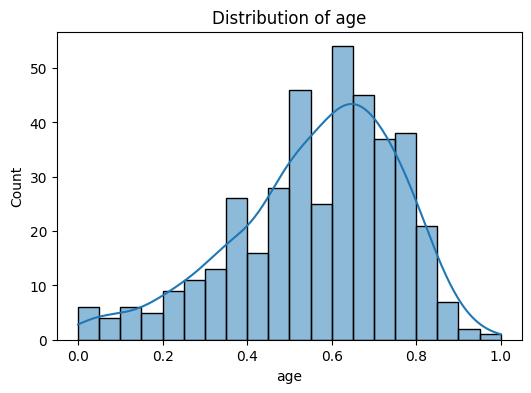

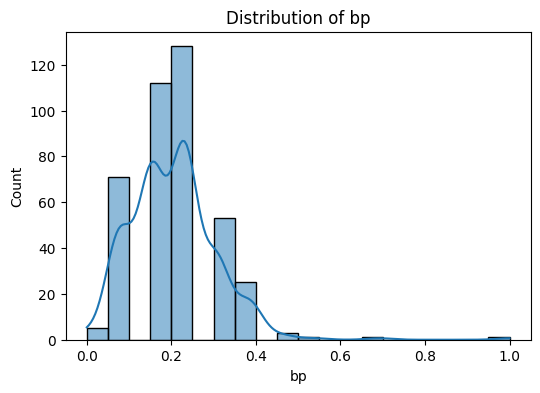

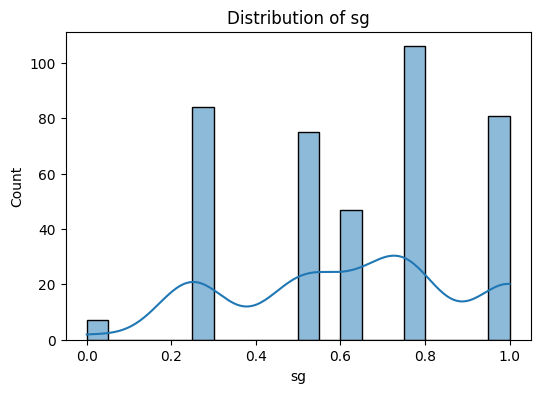

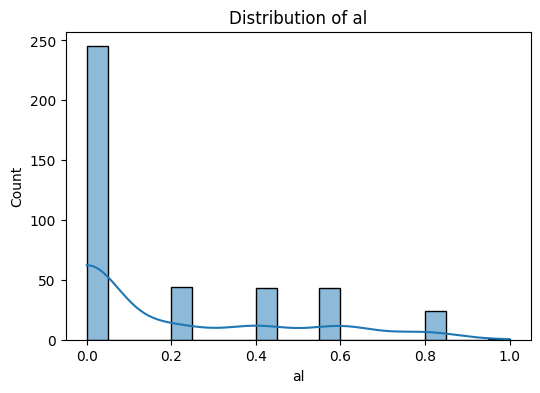

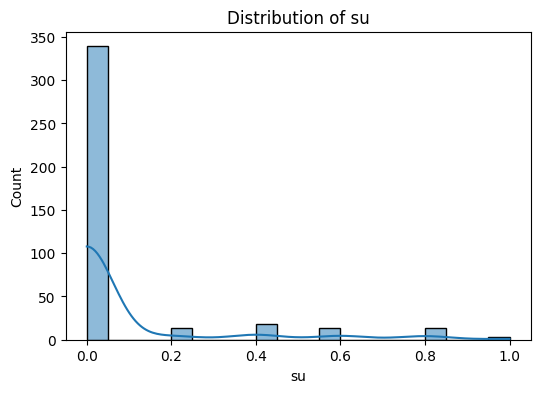

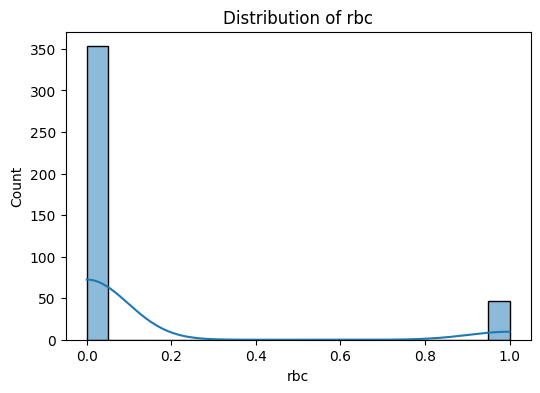

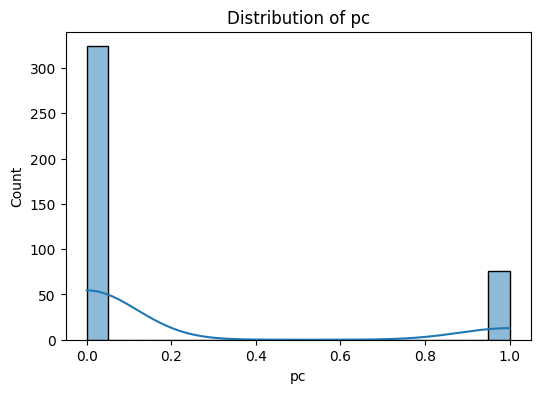

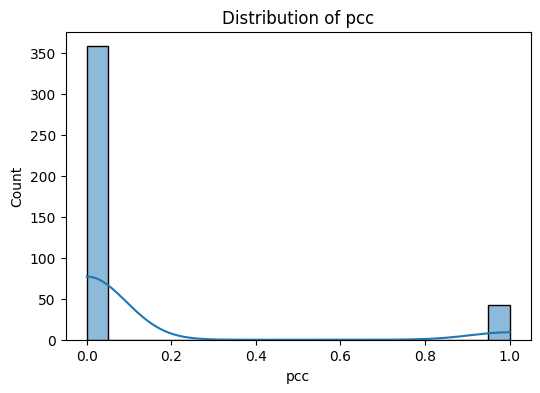

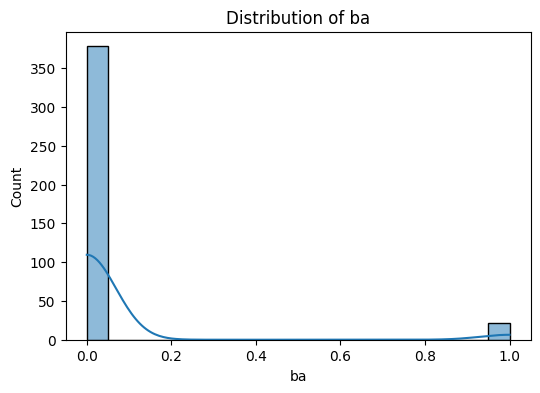

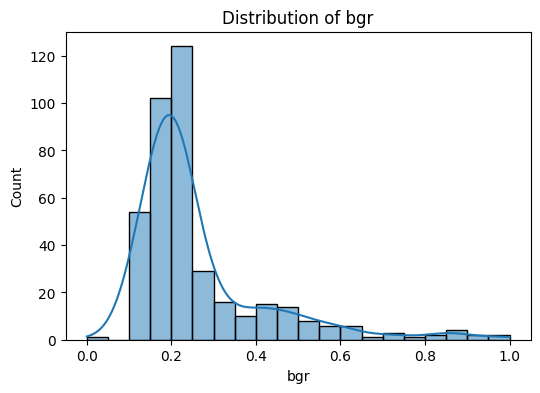

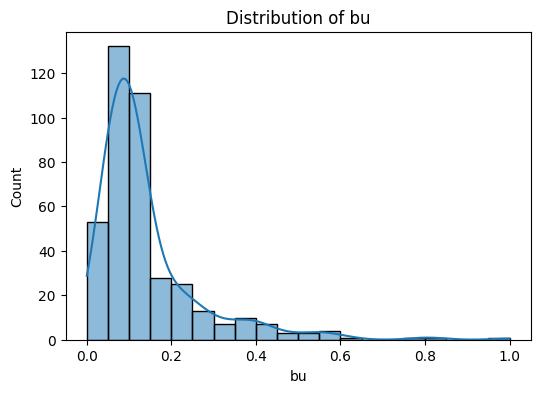

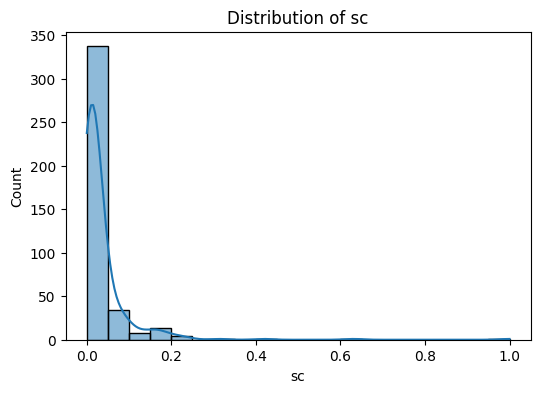

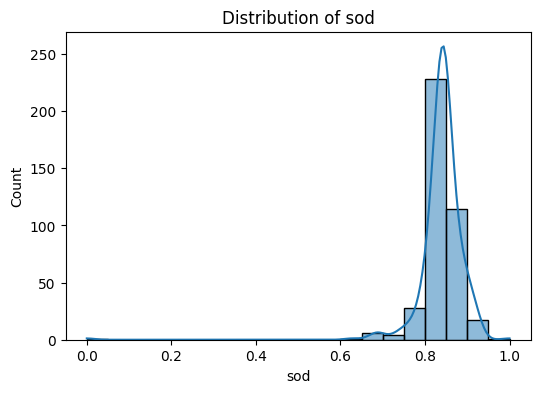

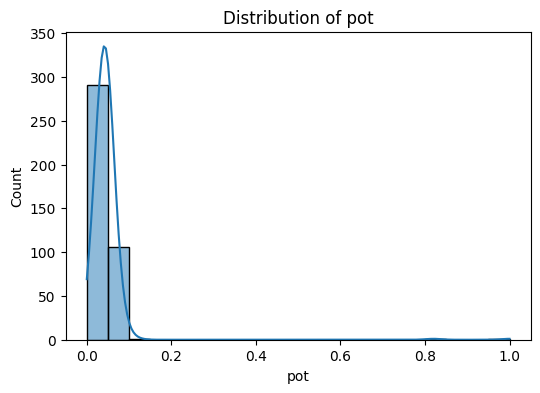

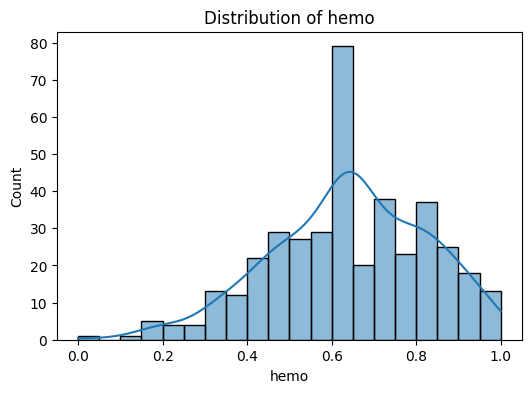

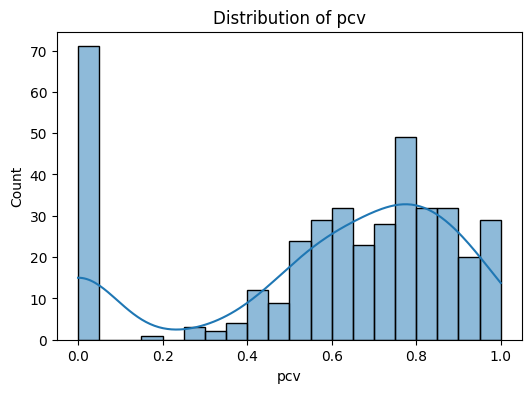

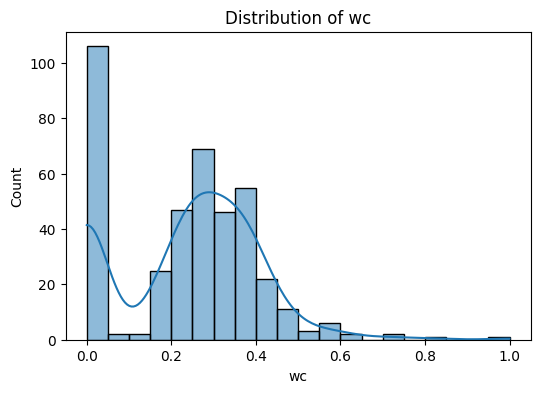

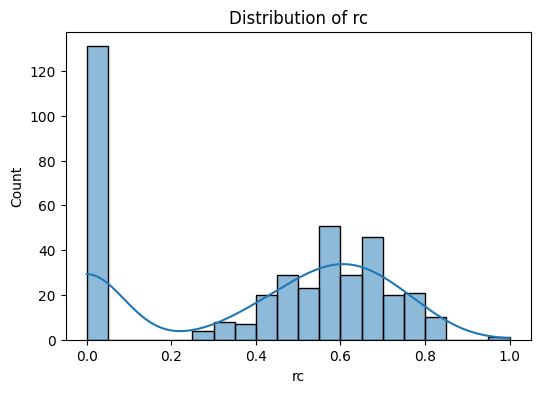

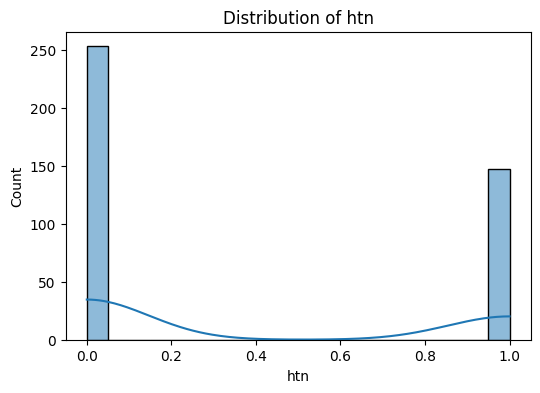

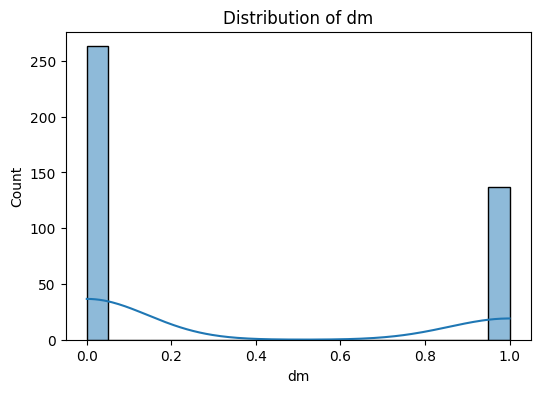

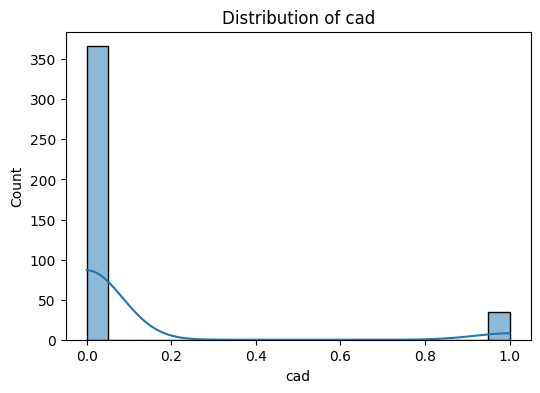

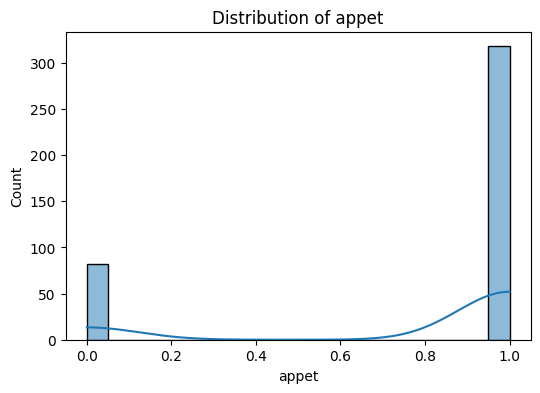

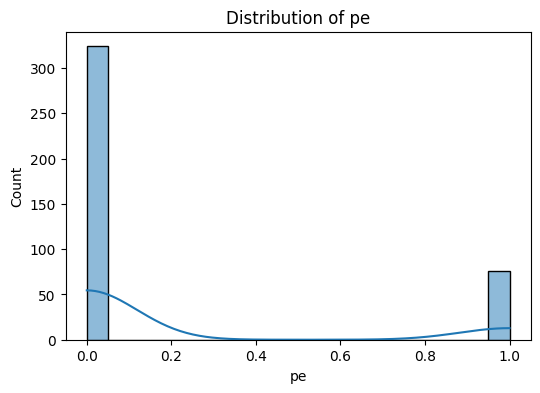

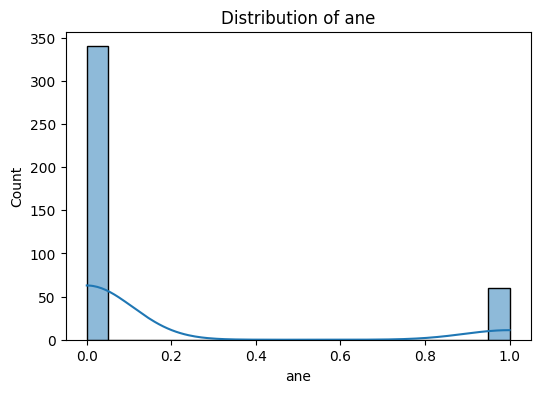

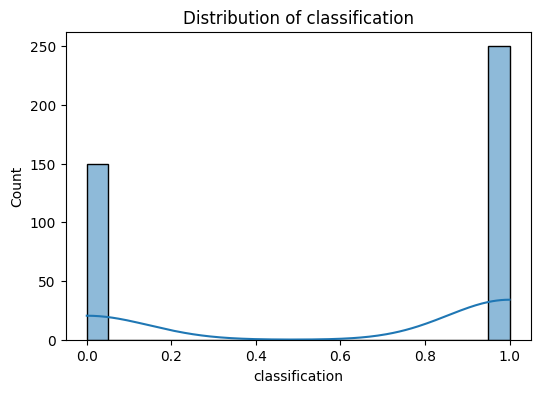

In [ ]:
# Again checking if normalization and imputation has not changed distro drastically.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Below we're implementing ANN.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

# We're defining features (X) and target (y)
X = df.drop('classification', axis=1).values
y = df['classification'].values

# We will split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We're initializing weights and biases for a 2-layer ANN
np.random.seed(42)
input_size = X_train.shape[1]
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Binary classification

# Weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# We're taking activation functions Relu and sigmoid.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Function for forward propagation
def forward_propagation(X):
    global W1, b1, W2, b2
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    # A2 =relu(Z2) accuracy going down beacause output is of binary type so sigmoid is used.
    return Z1, A1, Z2, A2

# Function for backpropagation
def backward_propagation(X, y, Z1, A1, Z2, A2, learning_rate=0.01):
    global W1, b1, W2, b2
    m = X.shape[0]

    # Now we'll compute gradients
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Now train the ANN
epochs = 50
learning_rate = 0.01

for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train)

    # Compute loss (binary cross-entropy)
    loss = -np.mean(y_train * np.log(A2.flatten() + 1e-8) + (1 - y_train) * np.log(1 - A2.flatten() + 1e-8))

    # Backward propagation
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2, learning_rate)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model,accuracy and F1 score.
_, _, _, A2_test = forward_propagation(X_test)
y_pred = (A2_test > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


f1 = f1_score(y_test, y_pred)


print(f"F1 Score: {f1:.4f}")

Epoch 0, Loss: 0.6936
Epoch 10, Loss: 0.6921
Epoch 20, Loss: 0.6907
Epoch 30, Loss: 0.6893
Epoch 40, Loss: 0.6880
Test Accuracy: 0.6500
F1 Score: 0.7879


In [ ]:
import numpy as np

# Below we're defining the hinge loss function for SVM
def hinge_loss(X, y, weights, bias):
    margin = y * (np.dot(X, weights) + bias)
    loss = np.maximum(0, 1 - margin)  # Hinge loss for incorrectly classified points
    return np.mean(loss) + 0.5 * np.dot(weights, weights)  # Add L2 regularization

# Below we've gradient descent function for optimization
def train_svm(X, y, learning_rate=0.001, epochs=1000, reg_strength=0.01):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(epochs):
        # Gradient calculations
        margins = y * (np.dot(X, weights) + bias)
        misclassified = margins < 1
        #misclassified is acting as indicator R.V.

        dw = reg_strength * weights - np.dot(X.T, y * misclassified) / num_samples
        db = -np.sum(y * misclassified) / num_samples

        # Now update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = hinge_loss(X, y, weights, bias)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias

# Prediction function
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, -1)

# Example dataset in pandas DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is a pandas DataFrame with binary classification
# Map classification to -1 and 1
df['classification'] = df['classification'].map({0: -1, 1: 1})

# Define features and target
X = df.drop('classification', axis=1).values
y = df['classification'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
weights, bias = train_svm(X_train, y_train, learning_rate=0.01, epochs=1000, reg_strength=0.01)

# Evaluate SVM using accuracy and F1 score:
y_pred = predict(X_test, weights, bias)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

Epoch 0, Loss: 0.9944
Epoch 100, Loss: 0.7665
Epoch 200, Loss: 0.8605
Epoch 300, Loss: 1.0782
Epoch 400, Loss: 1.3489
Epoch 500, Loss: 1.5807
Epoch 600, Loss: 1.7787
Epoch 700, Loss: 1.9424
Epoch 800, Loss: 2.0887
Epoch 900, Loss: 2.2193
Test Accuracy: 0.9875
F1 Score: 0.9903
